# 🚀 Week 02: Training Machine Learning Models 🎯  

This week, we dive deeper into **Machine Learning** by learning how to **train models** for different types of problems, including **classification** and **prediction** tasks. 🧠💡  

### What You’ll Learn:  
🔹 How to **train models** using real-world data.  
🔹 The role of **features** in improving predictions.  
🔹 How to **evaluate model performance** and fine-tune it.  
🔹 The impact of **hyperparameters** like learning rate and epochs.  

By the end of this week, you'll be able to build, train, and test models confidently. Get ready to experiment, analyze, and improve your models! 🚀🔥

## Exercise 01 : **Predicting Trip Fare using Linear Regression**  
---

### **Objective**  
The goal of this task is to build a machine learning model that predicts the fare price of a trip based on selected features. You will go through the full machine learning workflow, including data preprocessing, model training, evaluation, and visualization.  

### **Tasks Overview**  

Follow these steps to train and evaluate a machine learning model:  

1. **Load and Explore the Data** 📝  
2. **Prepare the Data** 🔧  
3. **Train the Model** 🎯  
4. **Make Predictions** 🔮  
5. **Evaluate the Model** 📊  

### **Resources**  
[A Visual Introduction To (Almost) Everything You Should Know](https://mlu-explain.github.io/linear-regression/)

---

###1.Load and Explore the Data 📝

Load the dataset using pandas and inspect its structure.
Check for missing values and basic statistics.
Visualize key features to understand their relationship with the target variable.

In [50]:
data_url = "https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv"
# add your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV file from the URL
db = pd.read_csv(data_url)
# Display the first few rows of the DataFrame


#data cleaning and processing
db.isna().sum()  # Check for missing values
# Drop rows with missing values
db = db.dropna()
# Convert 'trip_start_timestamp' to datetime
db['TRIP_START_TIMESTAMP'] = pd.to_datetime(db['TRIP_START_TIMESTAMP'])
# Convert 'TRIP_END_TIMESTAMP' to datetime
db['TRIP_END_TIMESTAMP'] = pd.to_datetime(db['TRIP_END_TIMESTAMP'])
# Extract the hour from 'TRIP_START_TIMESTAMP'
db['START_HOUR'] = db['TRIP_START_TIMESTAMP'].dt.hour + db['TRIP_START_TIMESTAMP'].dt.minute / 60
# Extract the day of the week from 'TRIP_START_TIMESTAMP'
db['DAY_OF_WEEK_START'] = db['TRIP_START_TIMESTAMP'].dt.dayofweek
# Extract the month from 'TRIP_START_TIMESTAMP'
db['MONTH_START'] = db['TRIP_START_TIMESTAMP'].dt.month
# Extract the year from 'TRIP_START_TIMESTAMP'
db['YEAR_OF_START'] = db['TRIP_START_TIMESTAMP'].dt.year


db['END_HOUR'] = db['TRIP_END_TIMESTAMP'].dt.hour + db['TRIP_END_TIMESTAMP'].dt.minute / 60
# Extract the day of the week from 'TRIP_END_TIMESTAMP'
db['DAY_OF_WEEK_END'] = db['TRIP_END_TIMESTAMP'].dt.dayofweek
# Extract the month from 'TRIP_END_TIMESTAMP'
db['MONTH_END'] = db['TRIP_END_TIMESTAMP'].dt.month
# Extract the year from 'TRIP_END_TIMESTAMP'
db['YEAR_OF_END'] = db['TRIP_END_TIMESTAMP'].dt.year
# Calculate the trip duration in minutes
db['TRIP_DURATION'] = (db['TRIP_END_TIMESTAMP'] - db['TRIP_START_TIMESTAMP']).dt.total_seconds() / 60
#check for negative trip durations
negative_durations = db[db['TRIP_DURATION'] < 0]
if not negative_durations.empty:
    print("Negative trip durations found:")
    print(negative_durations[['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_DURATION']])
#check for trips longer than 24 hours
long_trips = db[db['TRIP_DURATION'] > 1440]  # 1440 minutes = 24 hours
if not long_trips.empty:
    print("Trips longer than 24 hours found:")
    print(long_trips[['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_DURATION']])
#check for quality issues 
(db['TRIP_START_HOUR'] != db['TRIP_START_TIMESTAMP'].dt.hour).sum()
db['TRIP_TOTAL'].isna().sum()  # Check for missing values in 'TRIP_TOTAL'
db.head(10)  # Display the first few rows of the DataFrame after processing

/tmp/ipykernel_28492/1645775120.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db['TRIP_START_TIMESTAMP'] = pd.to_datetime(db['TRIP_START_TIMESTAMP'])
/tmp/ipykernel_28492/1645775120.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db['TRIP_END_TIMESTAMP'] = pd.to_datetime(db['TRIP_END_TIMESTAMP'])


,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,...,COMPANY,START_HOUR,DAY_OF_WEEK_START,MONTH_START,YEAR_OF_START,END_HOUR,DAY_OF_WEEK_END,MONTH_END,YEAR_OF_END,TRIP_DURATION
2,2022-05-17 17:15:00,2022-05-17 17:30:00,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,...,Sun Taxi,17.25,1,5,2022,17.50,1,5,2022,15.0
3,2022-05-17 18:00:00,2022-05-17 19:00:00,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,...,Choice Taxi Association,18.00,1,5,2022,19.00,1,5,2022,60.0
4,2022-05-17 17:00:00,2022-05-17 17:30:00,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,...,Flash Cab,17.00,1,5,2022,17.50,1,5,2022,30.0
5,2022-05-17 17:30:00,2022-05-17 18:00:00,17.50,1251,1.38,4.0,1.703108e+10,1.703128e+10,8.0,28.0,...,Flash Cab,17.50,1,5,2022,18.00,1,5,2022,30.0
6,2022-05-17 17:00:00,2022-05-17 17:30:00,17.00,1813,2.00,4.0,1.703108e+10,1.703128e+10,8.0,28.0,...,Sun Taxi,17.00,1,5,2022,17.50,1,5,2022,30.0
7,2022-05-17 17:30:00,2022-05-17 18:00:00,17.50,1857,2.05,4.0,1.703108e+10,1.703128e+10,8.0,28.0,...,Sun Taxi,17.50,1,5,2022,18.00,1,5,2022,30.0
8,2022-05-17 19:00:00,2022-05-17 19:00:00,19.00,787,0.87,4.0,1.703108e+10,1.703108e+10,8.0,8.0,...,City Service,19.00,1,5,2022,19.00,1,5,2022,0.0
11,2022-05-17 18:45:00,2022-05-17 18:45:00,18.75,540,0.60,4.0,1.703184e+10,1.703128e+10,32.0,28.0,...,Taxi Affiliation Services,18.75,1,5,2022,18.75,1,5,2022,0.0
12,2022-05-17 17:45:00,2022-05-17 18:00:00,17.75,720,0.80,4.0,1.703108e+10,1.703108e+10,8.0,8.0,...,Top Cab Affiliation,17.75,1,5,2022,18.00,1,5,2022,15.0
13,2022-05-17 16:45:00,2022-05-17 17:00:00,16.75,720,0.80,4.0,1.703184e+10,1.703108e+10,32.0,8.0,...,Globe Taxi,16.75,1,5,2022,17.00,1,5,2022,15.0


###2.Prepare the Data 🔧  
   - Select the most relevant features for training.  
   - Handle missing values if needed.  
   - Normalize or scale the data to improve performance if needed
   - Split the dataset into **training (80%)** and **testing (20%)** sets.  

>🙋 **Why we need to split our dataset**❓

In [51]:
# add your code here
#data cleaning and processing
db.isna().sum()  # Check for missing values
# Drop rows with missing values
db = db.dropna()
# Convert 'trip_start_timestamp' to datetime
db['TRIP_START_TIMESTAMP'] = pd.to_datetime(db['TRIP_START_TIMESTAMP'])
# Convert 'TRIP_END_TIMESTAMP' to datetime
db['TRIP_END_TIMESTAMP'] = pd.to_datetime(db['TRIP_END_TIMESTAMP'])
# Extract the hour from 'TRIP_START_TIMESTAMP'
db['START_HOUR'] = db['TRIP_START_TIMESTAMP'].dt.hour + db['TRIP_START_TIMESTAMP'].dt.minute / 60
# Extract the day of the week from 'TRIP_START_TIMESTAMP'
db['DAY_OF_WEEK_START'] = db['TRIP_START_TIMESTAMP'].dt.dayofweek
# Extract the month from 'TRIP_START_TIMESTAMP'
db['MONTH_START'] = db['TRIP_START_TIMESTAMP'].dt.month
# Extract the year from 'TRIP_START_TIMESTAMP'
db['YEAR_OF_START'] = db['TRIP_START_TIMESTAMP'].dt.year


db['END_HOUR'] = db['TRIP_END_TIMESTAMP'].dt.hour + db['TRIP_END_TIMESTAMP'].dt.minute / 60
# Extract the day of the week from 'TRIP_END_TIMESTAMP'
db['DAY_OF_WEEK_END'] = db['TRIP_END_TIMESTAMP'].dt.dayofweek
# Extract the month from 'TRIP_END_TIMESTAMP'
db['MONTH_END'] = db['TRIP_END_TIMESTAMP'].dt.month
# Extract the year from 'TRIP_END_TIMESTAMP'
db['YEAR_OF_END'] = db['TRIP_END_TIMESTAMP'].dt.year
# Calculate the trip duration in minutes
db['TRIP_DURATION'] = (db['TRIP_END_TIMESTAMP'] - db['TRIP_START_TIMESTAMP']).dt.total_seconds() / 60
#check for negative trip durations
negative_durations = db[db['TRIP_DURATION'] < 0]
if not negative_durations.empty:
    print("Negative trip durations found:")
    print(negative_durations[['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_DURATION']])
#check for trips longer than 24 hours
long_trips = db[db['TRIP_DURATION'] > 1440]  # 1440 minutes = 24 hours
if not long_trips.empty:
    print("Trips longer than 24 hours found:")
    print(long_trips[['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_DURATION']])
#check for quality issues 
(db['TRIP_START_HOUR'] != db['TRIP_START_TIMESTAMP'].dt.hour).sum()
db['TRIP_TOTAL'].isna().sum()  # Check for missing values in 'TRIP_TOTAL'
db.head(10)  # Display the first few rows of the DataFrame after processing

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,...,COMPANY,START_HOUR,DAY_OF_WEEK_START,MONTH_START,YEAR_OF_START,END_HOUR,DAY_OF_WEEK_END,MONTH_END,YEAR_OF_END,TRIP_DURATION
2,2022-05-17 17:15:00,2022-05-17 17:30:00,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,...,Sun Taxi,17.25,1,5,2022,17.50,1,5,2022,15.0
3,2022-05-17 18:00:00,2022-05-17 19:00:00,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,...,Choice Taxi Association,18.00,1,5,2022,19.00,1,5,2022,60.0
4,2022-05-17 17:00:00,2022-05-17 17:30:00,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,...,Flash Cab,17.00,1,5,2022,17.50,1,5,2022,30.0
5,2022-05-17 17:30:00,2022-05-17 18:00:00,17.50,1251,1.38,4.0,1.703108e+10,1.703128e+10,8.0,28.0,...,Flash Cab,17.50,1,5,2022,18.00,1,5,2022,30.0
6,2022-05-17 17:00:00,2022-05-17 17:30:00,17.00,1813,2.00,4.0,1.703108e+10,1.703128e+10,8.0,28.0,...,Sun Taxi,17.00,1,5,2022,17.50,1,5,2022,30.0
7,2022-05-17 17:30:00,2022-05-17 18:00:00,17.50,1857,2.05,4.0,1.703108e+10,1.703128e+10,8.0,28.0,...,Sun Taxi,17.50,1,5,2022,18.00,1,5,2022,30.0
8,2022-05-17 19:00:00,2022-05-17 19:00:00,19.00,787,0.87,4.0,1.703108e+10,1.703108e+10,8.0,8.0,...,City Service,19.00,1,5,2022,19.00,1,5,2022,0.0
11,2022-05-17 18:45:00,2022-05-17 18:45:00,18.75,540,0.60,4.0,1.703184e+10,1.703128e+10,32.0,28.0,...,Taxi Affiliation Services,18.75,1,5,2022,18.75,1,5,2022,0.0
12,2022-05-17 17:45:00,2022-05-17 18:00:00,17.75,720,0.80,4.0,1.703108e+10,1.703108e+10,8.0,8.0,...,Top Cab Affiliation,17.75,1,5,2022,18.00,1,5,2022,15.0
13,2022-05-17 16:45:00,2022-05-17 17:00:00,16.75,720,0.80,4.0,1.703184e+10,1.703108e+10,32.0,8.0,...,Globe Taxi,16.75,1,5,2022,17.00,1,5,2022,15.0


In [53]:
#select features for analysis
y_feature = 'TRIP_TOTAL'
X_features = ['START_HOUR','MONTH_START','YEAR_OF_START','DAY_OF_WEEK_START', 'END_HOUR','MONTH_END','YEAR_OF_END','DAY_OF_WEEK_END','TRIP_START_HOUR','TRIP_MILES','TRIP_SPEED','PICKUP_CENSUS_TRACT','DROPOFF_CENSUS_TRACT','PICKUP_COMMUNITY_AREA','DROPOFF_COMMUNITY_AREA']

db = db[X_features + [y_feature]]

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
db[X_features] = scaler.fit_transform(db[X_features])
#scale the target variable
db[y_feature] = scaler.fit_transform(db[[y_feature]])
X = db[X_features]
y = db[y_feature]
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a linear regression model

### 3. Train the Model 🎯  

Train a **linear regression model** using `sklearn` (you can also try other alternatives).  

🔧 **Experiment with Different Features**  
- Start with a few features and observe the model's performance.  
- Try adding or removing features to see how it affects accuracy.  

> 🙋 **What are hyperparameters, and how do learning rate and epochs affect training** ❓

> 🙋 **Does using more features always improve the model** ❓

In [ ]:
# add your code here
# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


Mean Squared Error: 0.029694310981427365
R^2 Score: 0.968999441267558
         Actual  Predicted
26040  1.372562   1.454639
23678  0.373282   0.396922
3357  -0.445330  -0.604673
13483 -0.958643  -0.856164
22755  1.540677   1.703873


#### 🎉 Congratulations! 🎉

**🚀You’ve just trained your first Machine Learning model! 🚀**

### 4. Make Predictions 🔮  

Use the trained model to predict values on the **testing data**.  
Compare the predictions with the actual values to assess accuracy.  
You can also try making predictions on the **training data** to see how well the model memorized the patterns.  

>🙋 **Why doesn’t the model predict exact values, even when using the training data**❓

In [59]:
# add your code here
#use the model to make predictions on the test set
y_pred = model.predict(X_test)
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# Display the first few rows of the comparison DataFrame
print(comparison_df.head())

         Actual  Predicted
26040  1.372562   1.454639
23678  0.373282   0.396922
3357  -0.445330  -0.604673
13483 -0.958643  -0.856164
22755  1.540677   1.703873


###5.Evaluate the Model 📊

Measure performance using metrics like MSE, RMSE, and R² Score.
Plot a loss curve to track training progress.
Create a scatter plot to compare actual vs. predicted values.

>🙋 **What do MSE, RMSE, and R² Score tell us about the model's performance**❓

>🙋 **How can you tell if your model is overfitting or underfitting**❓


In [68]:
# add your code here
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.029694310981427365
R^2 Score: 0.968999441267558


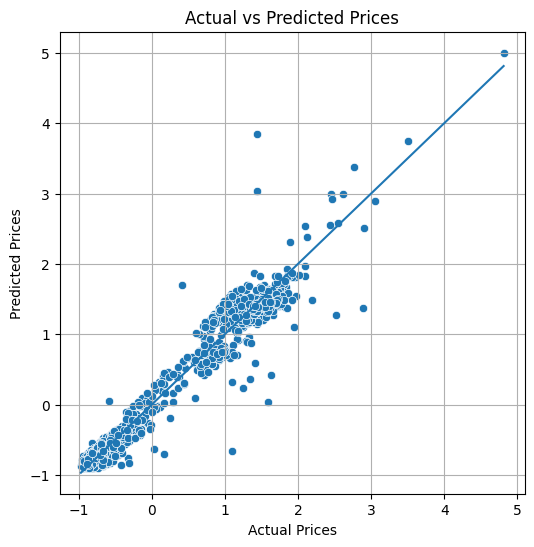

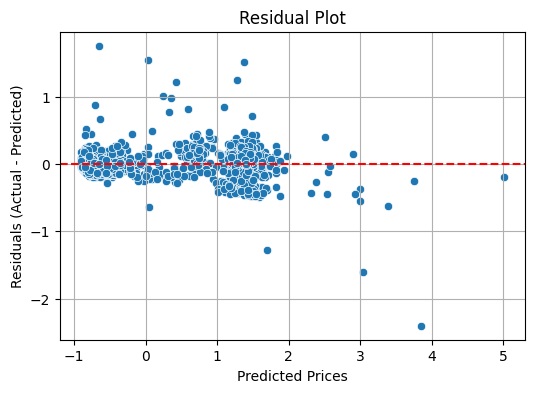

In [71]:
#Loss curve 
%matplotlib inline
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

# Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [ ]:
import gradio as gr
#deploy the model using Gradio
def predict_trip_total(features):
    features = np.array(features).reshape(1, -1)
    features = scaler.transform(features)  # Scale the input features
    prediction = model.predict(features)
    return prediction[0]
# Define the Gradio interface
iface = gr.Interface(
    fn=predict_trip_total,
    inputs=[
        gr.Textbox(label="Start Hour"),
        gr.Textbox(label="Month Start"),
        gr.Textbox(label="Year of Start"),
        gr.Textbox(label="Day of Week Start"),
        gr.Textbox(label="End Hour"),
        gr.Textbox(label="Month End"),
        gr.Textbox(label="Year of End"),
        gr.Textbox(label="Day of Week End"),
        gr.Textbox(label="Trip Start Hour"),
        gr.Textbox(label="Trip Miles"),
        gr.Textbox(label="Trip Speed"),
        gr.Textbox(label="Pickup Census Tract"),
        gr.Textbox(label="Dropoff Census Tract"),
        gr.Textbox(label="Pickup Community Area"),
        gr.Textbox(label="Dropoff Community Area")
    ],
    outputs=gr.Textbox(label="Predicted Trip Total")
)
# Launch the Gradio interface
iface.launch(share=True)  # Set share=True to allow public access
# Save the model and scaler for future use
import joblib
joblib.dump(model, 'taxi_fare_model.pkl')
joblib.dump(scaler, 'taxi_fare_scaler.pkl')
# Save the processed DataFrame for future use
db.to_csv('processed_taxi_data.csv', index=False)
# Save the comparison DataFrame for future reference
comparison_df.to_csv('taxi_fare_comparison.csv', index=False)


/home/hiba/Desktop/Entry-Level-ML-Engineer-Bootcamp/.venv/lib/python3.12/site-packages/gradio/utils.py:1028: UserWarning: Expected 1 arguments for function <function predict_trip_total at 0x76fac0b016c0>, received 15.
  warnings.warn(
/home/hiba/Desktop/Entry-Level-ML-Engineer-Bootcamp/.venv/lib/python3.12/site-packages/gradio/utils.py:1036: UserWarning: Expected maximum 1 arguments for function <function predict_trip_total at 0x76fac0b016c0>, received 15.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://bb2c4b412c8983df8b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


---
## Exercise 02 : **University Admission Prediction Challenge**

😇 I know that the exercise is difficult, but you will practice what you learned last week along with your first classification algorithm.

### 🎯 Objective

Your mission is to predict whether a student will be admitted to their desired university based on various academic and application-related factors. You’ll use **Logistic Regression** to build a predictive model and discuss its strengths and limitations.

📊 The Dataset  :

[Admission_Predict.csv](https://github.com/1337-Artificial-Intelligence/Entry-Level-ML-Engineer-Bootcamp/blob/main/Week02/Admission_Prediction_Challenge.csv)

The dataset contains information on **400 students** with the following attributes:

- **GRE Score** 🎓
- **TOEFL Score** 📚
- **University Rating** 🏛️
- **Statement of Purpose (SOP) Score** ✍️
- **Letter of Recommendation (LOR) Score** 📩
- **Cumulative Grade Point Average (CGPA)** 🎯
- **Research Experience (Yes/No)** 🔬
- **Chance of Admission (Target Variable: 0 or 1)**

### 🛠️ Steps to Follow

1. **Load & Explore the Data**: Understand the dataset, check for missing values, and analyze distributions.
2. **Feature Selection & Processing**: Identify relevant features and scale them if needed.
3. **Train a Logistic Regression Model**: Implement Logistic Regression (**from scratch** optional) to classify students into "Admitted" or "Not Admitted."
4. **Evaluate the Model**: Measure accuracy, precision, recall, and other key metrics.(do some reaserch 🙂)
5. **Discuss Limitations**: Explore cases where Logistic Regression may struggle and suggest improvements (e.g., feature engineering, alternative models).

### **Resources**  
[Logistic Regression](https://mlu-explain.github.io/logistic-regression/)

### 🎨 Bonus: Visual Exploration

Use **histograms, correlation heatmaps, and scatter plots** to gain insights before modeling.

🔎 **Can you build a model that accurately predicts student admissions?** Let's find out! 🚀

In [ ]:
# add your code here

---
##🎉 **Congratulations!** 🎉  

You've successfully trained your first **Linear Regression** and **Logistic Regression** models! 🚀  

Through this journey, you've learned:  
✅ How to **prepare and preprocess data** for training.  
✅ The importance of **choosing the right features** and tuning **hyperparameters**.  
✅ How to **train, predict, and evaluate models** using key metrics.  
✅ The difference between **regression (predicting continuous values)** and **classification (predicting categories)**.  

This is a **big step** in your Machine Learning journey! 💡 But ML is much more than just linear and logistic regression—there are many other models and techniques to explore.  

🔎 **Next Challenge:**  
- Research other **types of ML models** (e.g., Decision Trees, SVMs, Neural Networks).  
- Try solving different **real-world problems** using what you've learned.  

👏 Keep experimenting, keep learning, and welcome to the world of Machine Learning! 🚀🔥